In [1]:
import pandas as pd

df = pd.read_csv("Advertising.csv")
df = df.iloc[:, 1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
df.info

<bound method DataFrame.info of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


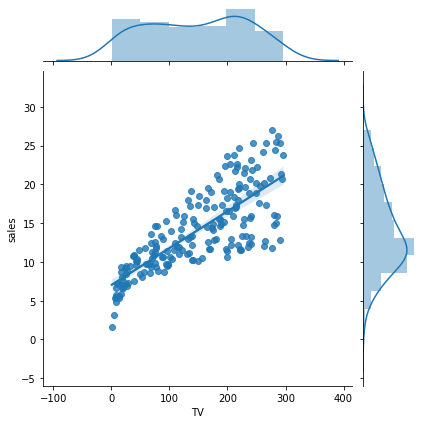

In [4]:
import seaborn as sns

sns.jointplot(x="TV", y="sales", data=df, kind="reg");

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [7]:
y = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [8]:
regression = LinearRegression()

In [9]:
model = regression.fit(X, y)

In [12]:
model

LinearRegression()

In [30]:
str(model)

'LinearRegression()'

In [31]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [34]:
model.intercept_  # b0

array([7.03259355])

In [35]:
model.coef_  # b1

array([[0.04753664]])

In [40]:
# R^2 ifadesi

model.score(X, y)

0.611875050850071

### MODEL TAHMİN 

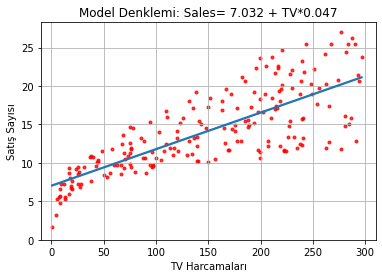

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.grid()
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={"color":"r", "s": 9}) # ci=güven aralığı, scatter_kws=renklendirme
g.set_title("Model Denklemi: Sales= 7.032 + TV*0.047")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0);

In [50]:
model.intercept_ + model.coef_*180

array([[15.58918883]])

In [49]:
model.predict([[180]])

array([[15.58918883]])

In [51]:
yeni_veri = [[10], [20], [60]]

In [52]:
model.predict(yeni_veri)

array([[7.50795995],
       [7.98332636],
       [9.88479198]])

# ARTIKLAR

### MSE: HATA KARELER ORTALAMASI
### RMSE: HATA KARELER ORTALAMASININ KAREKÖKÜ

In [89]:
gercek_y = pd.DataFrame(y[:])

In [90]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[:])

In [91]:
tahmin_edilen_y

,0
0,17.970775
1,9.147974
2,7.850224
3,14.234395
4,15.627218
...,...
195,8.848493
196,11.510545
197,15.446579
198,20.513985


In [92]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis=1)

In [93]:
hatalar.columns = ["gercek_y", "tahmin_edilen_y"]

In [94]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
...,...,...
195,7.6,8.848493
196,9.7,11.510545
197,12.8,15.446579
198,25.5,20.513985


In [95]:
hatalar["artık/hatalar"] = hatalar["gercek_y"]-hatalar["tahmin_edilen_y"]

In [96]:
hatalar

,gercek_y,tahmin_edilen_y,artık/hatalar
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
...,...,...,...
195,7.6,8.848493,-1.248493
196,9.7,11.510545,-1.810545
197,12.8,15.446579,-2.646579
198,25.5,20.513985,4.986015


In [100]:
hatalar["hata kareler"] = pow(hatalar["artık/hatalar"], 2)

In [101]:
hatalar

,gercek_y,tahmin_edilen_y,artık/hatalar,hata kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
...,...,...,...,...
195,7.6,8.848493,-1.248493,1.558735
196,9.7,11.510545,-1.810545,3.278073
197,12.8,15.446579,-2.646579,7.004380
198,25.5,20.513985,4.986015,24.860348


In [108]:
round(hatalar["hata kareler"].mean(), 5)

10.51265

In [109]:
import numpy as np
round(np.mean(hatalar["hata kareler"]), 5)

10.51265